In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf

In [109]:
data = pd.read_csv('data_without_anomaly.csv', index_col=0, header = 0)
data.head(3)

,Datetime,groundspeed,throttle,Xacc,Yacc,Zacc,Xgyro,Ygyro,Zgyro,Xmag,Ymag,Zmag
0,2022-10-25 19:11:06,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0
1,2022-10-25 19:11:07,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0
2,2022-10-25 19:11:08,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0


In [110]:
plt.figure(figsize=(7,5))
fig = px.line(data, x=data.Datetime, y='groundspeed', title='Groundspeed with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show() 

<Figure size 700x500 with 0 Axes>

In [111]:
data.describe()

,groundspeed,throttle,Xacc,Yacc,Zacc,Xgyro,Ygyro,Zgyro,Xmag,Ymag,Zmag
count,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.000000,6280.0
mean,4.920376,24.385510,-0.163217,0.323567,-1000.995064,1.676433,1.683439,2.507484,-0.321656,0.466401,-528.0
std,0.572374,3.228705,15.526671,27.624535,0.070091,1.263406,1.265054,74.346712,102.475641,214.808808,0.0
min,0.000000,0.000000,-127.000000,-419.000000,-1001.000000,0.000000,0.000000,-1101.000000,-238.000000,-238.000000,-528.0
25%,4.999590,25.000000,0.000000,0.000000,-1001.000000,1.000000,1.000000,0.000000,-59.000000,-231.000000,-528.0
50%,5.000502,25.000000,0.000000,0.000000,-1001.000000,2.000000,2.000000,2.000000,-39.000000,52.000000,-528.0
75%,5.001149,25.000000,0.000000,0.000000,-1001.000000,3.000000,3.000000,3.000000,59.000000,230.000000,-528.0
max,5.505579,39.000000,170.000000,456.000000,-1000.000000,4.000000,4.000000,1123.000000,238.000000,238.000000,-528.0


In [112]:
data.drop_duplicates(subset=['Datetime'], keep=False,inplace=True)
data.drop(['Datetime'],axis=1,inplace=True)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 0 to 6279
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   groundspeed  6280 non-null   float64
 1   throttle     6280 non-null   float64
 2   Xacc         6280 non-null   float64
 3   Yacc         6280 non-null   float64
 4   Zacc         6280 non-null   float64
 5   Xgyro        6280 non-null   float64
 6   Ygyro        6280 non-null   float64
 7   Zgyro        6280 non-null   float64
 8   Xmag         6280 non-null   float64
 9   Ymag         6280 non-null   float64
 10  Zmag         6280 non-null   float64
dtypes: float64(11)
memory usage: 588.8 KB


In [11]:
data.columns

Index(['groundspeed', 'throttle', 'Xacc', 'Yacc', 'Zacc', 'Xgyro', 'Ygyro',
       'Zgyro', 'Xmag', 'Ymag', 'Zmag'],
      dtype='object')

In [12]:
data.select_dtypes('object').columns

Index([], dtype='object')

In [15]:
"""

Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode
target values, i.e. y, and not the input X.

LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels
(as long as they are hashable and comparable) to numerical labels.

"""


for i in data.select_dtypes('object').columns:
    le = LabelEncoder().fit(data[i])
    data[i] = le.transform(data[i])

In [16]:
data.head(3)

,groundspeed,throttle,Xacc,Yacc,Zacc,Xgyro,Ygyro,Zgyro,Xmag,Ymag,Zmag
0,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0
1,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0
2,0.0,0.0,0.0,0.0,-1001.0,0.0,0.0,0.0,232.0,52.0,-528.0


In [88]:
validate = data[['groundspeed', 'throttle', 'Xacc', 'Yacc', 'Zacc', 'Xgyro', 'Ygyro', 'Zgyro', 'Xmag', 'Ymag', 'Zmag']].tail(10)
data.drop(data.tail(1).index,inplace=True)
validate.head(2)

,groundspeed,throttle,Xacc,Yacc,Zacc,Xgyro,Ygyro,Zgyro,Xmag,Ymag,Zmag
6249,5.000767,25.0,0.0,0.0,-1001.0,3.0,3.0,3.0,-58.0,231.0,-528.0
6250,5.001520,25.0,0.0,0.0,-1001.0,3.0,3.0,3.0,-58.0,231.0,-528.0


In [19]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [22]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(data[['throttle', 'Xgyro', 'Ygyro', 'Zgyro', 'Xmag', 'Ymag', 'Zmag']])
Y_data = Y_scaler.fit_transform(data[['groundspeed']])
X_data.shape, Y_data.shape

((6260, 7), (6260, 1))

In [89]:
hist_window = 100
horizon = 10
TRAIN_SPLIT = 3200
VAL_SPLIT = 4700
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, VAL_SPLIT, hist_window, horizon)
x_test, y_test = custom_ts_multi_data_prep(X_data, Y_data, VAL_SPLIT, None, hist_window, horizon)

In [90]:
x_train.shape, x_vali.shape, x_test.shape

((3100, 100, 7), (1400, 100, 7), (1450, 100, 7))

In [91]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.        ]
 [0.         0.         0.         0.49505396 0.98739496 0.6092437
  0.     

In [92]:
batch_size = 64
buffer_size = 128

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [93]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse', metrics=["mae"])


In [94]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 100, 400)         332800    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 100, 20)           8020      
                                                                 
 bidirectional_5 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 20)                6020      
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)               

In [95]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [96]:
# Training the model

In [97]:
history = lstm_model.fit(train_data,
                         epochs=30,
                         steps_per_epoch=100,
                         validation_data=val_data,
                         validation_steps=50,
                         verbose=1,
                         callbacks=callbacks)

Epoch 1/30
100/100 [==============================] - 60s 533ms/step - loss: 0.1102 - mae: 0.2515 - val_loss: 0.0037 - val_mae: 0.0450
Epoch 2/30
100/100 [==============================] - 52s 516ms/step - loss: 0.0473 - mae: 0.1711 - val_loss: 0.0038 - val_mae: 0.0466
Epoch 3/30
100/100 [==============================] - 51s 510ms/step - loss: 0.0343 - mae: 0.1462 - val_loss: 0.0030 - val_mae: 0.0440
Epoch 4/30
100/100 [==============================] - 51s 512ms/step - loss: 0.0274 - mae: 0.1302 - val_loss: 0.0019 - val_mae: 0.0226
Epoch 5/30
100/100 [==============================] - 52s 517ms/step - loss: 0.0225 - mae: 0.1181 - val_loss: 0.0022 - val_mae: 0.0320
Epoch 6/30
100/100 [==============================] - 51s 515ms/step - loss: 0.0191 - mae: 0.1085 - val_loss: 0.0024 - val_mae: 0.0354
Epoch 7/30
100/100 [==============================] - 52s 521ms/step - loss: 0.0171 - mae: 0.1023 - val_loss: 0.0025 - val_mae: 0.0378
Epoch 8/30
100/100 [==============================] - 5

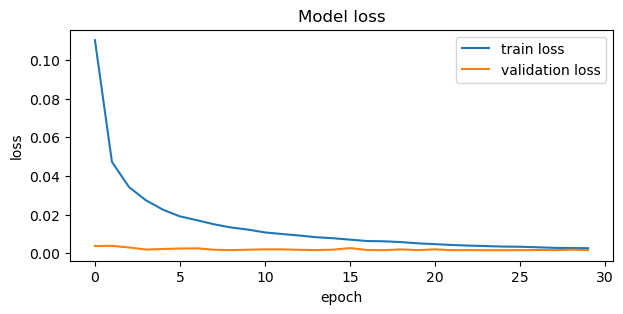

In [98]:
plt.figure(figsize=(7,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [99]:
data.columns

Index(['groundspeed', 'throttle', 'Xacc', 'Yacc', 'Zacc', 'Xgyro', 'Ygyro',
       'Zgyro', 'Xmag', 'Ymag', 'Zmag'],
      dtype='object')

In [100]:
pred = lstm_model.predict(x_test)
pred

46/46 [==============================] - 5s 72ms/step


array([[0.91545725, 0.9072386 , 0.91980815, ..., 0.90847826, 0.9097675 ,
        0.9034859 ],
       [0.9153905 , 0.9071992 , 0.9197926 , ..., 0.9084239 , 0.9097132 ,
        0.90343535],
       [0.9154165 , 0.9072048 , 0.9198104 , ..., 0.9084308 , 0.90972763,
        0.90343493],
       ...,
       [0.91150725, 0.9040432 , 0.92132306, ..., 0.9046809 , 0.90789676,
        0.90081966],
       [0.9115091 , 0.9040433 , 0.92132413, ..., 0.9046812 , 0.90789855,
        0.90081984],
       [0.9115125 , 0.90404594, 0.9213257 , ..., 0.9046844 , 0.90790176,
        0.90082276]], dtype=float32)

In [101]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [102]:
pred_Inverse

array([[5.040122 , 4.994874 , 5.0640764, ..., 5.001699 , 5.0087967,
        4.974213 ],
       [5.039755 , 4.994657 , 5.0639906, ..., 5.0013995, 5.0084977,
        4.9739347],
       [5.039898 , 4.9946876, 5.064089 , ..., 5.0014377, 5.0085773,
        4.9739323],
       ...,
       [5.0183754, 4.977281 , 5.072417 , ..., 4.980792 , 4.9984975,
        4.9595337],
       [5.0183854, 4.977282 , 5.072423 , ..., 4.980794 , 4.998507 ,
        4.9595346],
       [5.018404 , 4.9772964, 5.0724316, ..., 4.9808116, 4.9985247,
        4.959551 ]], dtype=float32)

In [103]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [104]:
pred_Inverse[0]

array([5.040122 , 4.994874 , 5.0640764, 5.03065  , 5.0515046, 5.0066338,
       4.9837065, 5.001699 , 5.0087967, 4.974213 ], dtype=float32)

In [105]:
timeseries_evaluation_metrics_func(validate['groundspeed'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 0.2925620216654333
MAE is : 0.23070202763366704
RMSE is : 0.5408900273303561
MAPE is : 6.361395655831327
R2 is : -0.1464720903652863



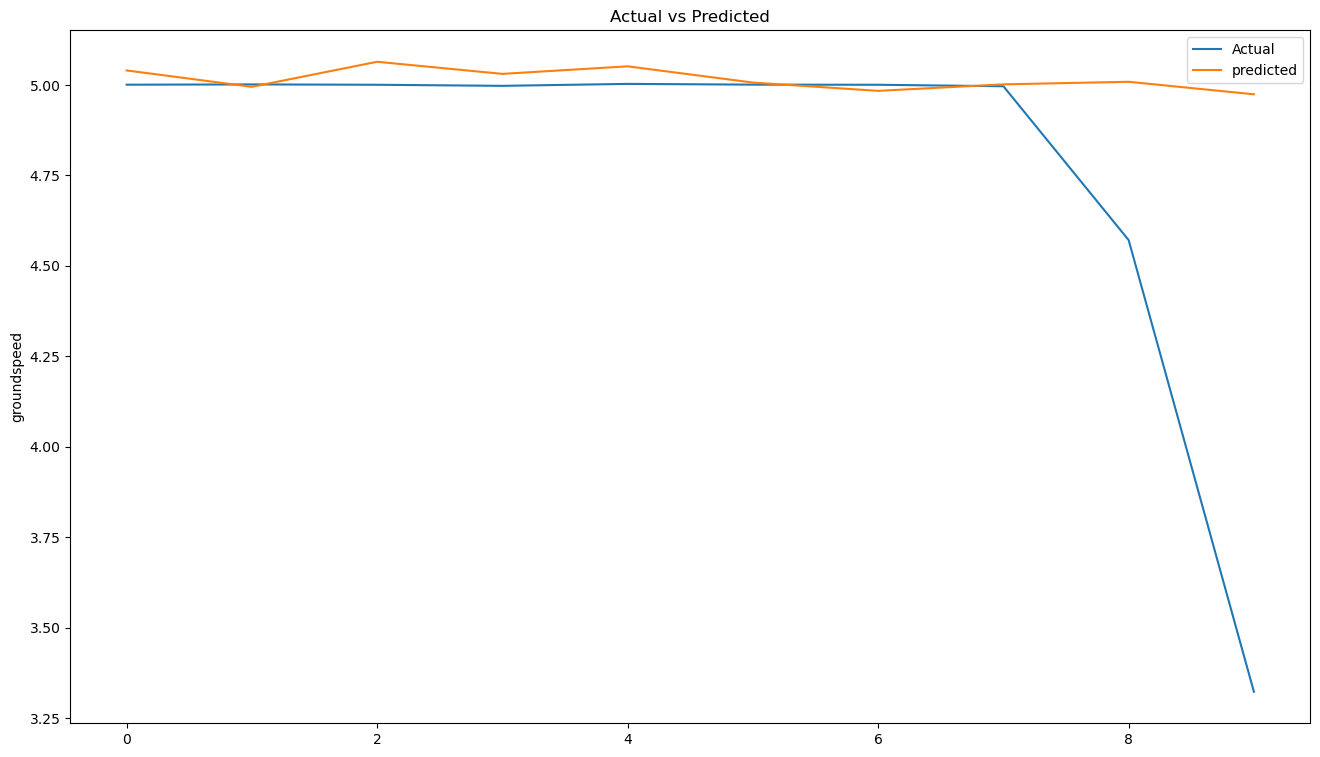

In [106]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['groundspeed']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("groundspeed")
plt.legend(('Actual','predicted'))
plt.show()